# matplotlib.animationでアニメーションを作る

matplotlibには、アニメーションを作るモジュールのmatplotlib.animationがあります。  
このnotebookでは、これを使って二種類のアニメーション作成の方法を試していきます。

まずは必要なライブラリをimportしましょう。

また、juputer notebook上でアニメーションを表示するには、%matplotlb notebookというマジックコマンドを使う必要があります。

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random

## 既データが出揃っている場合のアニメーションの作り方 
ここでは、animation.ArtistAnimationを使います。  
この関数は、第二引数にアニメーションにしたいプロットを格納したリストを渡すことで、リストの先頭から連続で表示してくれます。

<IPython.core.display.Javascript object>


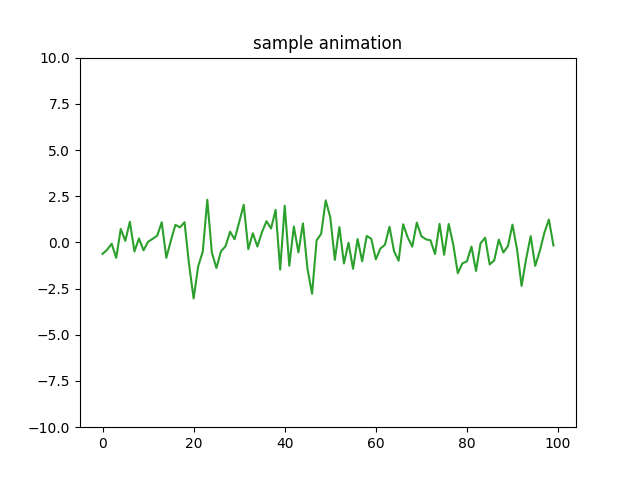

In [2]:
fig = plt.figure()
ims = []

for i in range(100):
        rand = np.random.randn(100)     # 100個の乱数を作成
        
        img = plt.plot(rand)             # グラフを作成
        plt.title("sample animation")
        plt.ylim(-10,10)
        
        ims.append(img)                  # グラフを配列に追加
        
        

# 100枚のプロットを 100ms ごとに表示するアニメーション
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

もしも作ったアニメーションを保存したい場合は以下の関数を使います。 
```
ani.save('sample_gif.gif', writer='imagemagick')
```
第一引数がファイル名、第二引数がgifを作るために使うソフト名です。  
imagemagickをインストールしていない場合はこれをインストールして、matplotlibrcにwriterソフトのパスを指定する必要があります。

matplotlibrcの場所を確認するには、
```python
matplotlib.matplotlib_fname()
```
を実行します。  
表示されたファイルパスをテキストエディタで開いて、
```
animation.convert_path: "convert"
```

と書かれているところを見つけてください。  
これを
```
animation.convert_path: writerソフトのパス
```
に書き直せばanimation.saveが使えます。

## リアルタイムに描画したいデータが作られる場合のアニメーションの作り方

animation.FuncAnimationを使います。  
この関数は「第二引数にアニメーションとして表示したいプロットを作る関数」を渡すことで、リアルタイムにアニメーションを表示します。  
機械学習のモデルの学習状況のモニタリングなどに使えそうですね。

<IPython.core.display.Javascript object>


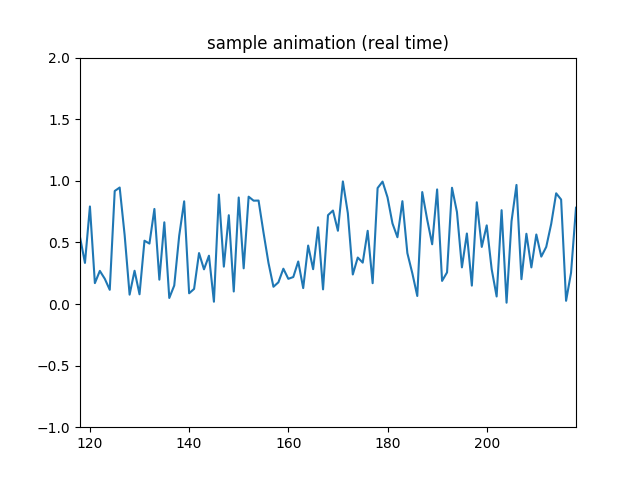

In [3]:
fig = plt.figure()

xlim = [0,100]
X, Y = [], []

def plot(data):
    plt.cla()                   # 前のグラフを削除
    
    Y.append(random.random())   # データを作成
    X.append(len(Y))
    
    if len(X) > 100:            # 描画範囲を更新
        xlim[0]+=1
        xlim[1]+=1
    
    plt.plot(X, Y)              # 次のグラフを作成
    plt.title("sample animation (real time)")
    plt.ylim(-1,2)
    plt.xlim(xlim[0],xlim[1])
    

# 10msごとにplot関数を呼び出してアニメーションを作成
ani = animation.FuncAnimation(fig, plot, interval=10, blit=True)
#ani.save('sample2.gif', writer='imagemagick')
plt.show()